# Descriptive and plots HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [102]:
colorblind_palette = ['#5ab4ac', '#b2182b', '#2d004b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load data

In [20]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/descriptive/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [21]:
df_cleaned = pd.read_csv(f'{FILE_PATH}/07_preprocessed.csv')
df_cleaned.head()

,subject_id,body_pos_x,body_pos_z,pointer_pos_x,pointer_pos_z,pointer_dir_x,pointer_dir_z,target_game_object_name,avatar_presence,avatar_id,...,moved_target_position_x,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,01_CmA_0_14,True,1,...,261.011810,309.964874,49.900308,136.943970,49.900308,136.943970,87.043662,87.043662,87.0,87.0
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,01_CmA_0_14,True,1,...,109.237183,181.994720,59.026904,15.076639,59.026904,15.076639,-43.950265,316.049735,-44.0,316.0
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,01_CmA_0_14,True,1,...,-30.280807,152.150543,101.255862,148.328125,101.255862,148.328125,47.072263,47.072263,47.0,47.0
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,01_CmA_0_14,True,1,...,470.582397,80.014893,9.649925,8.743356,9.649925,8.743356,-0.906569,359.093431,-1.0,359.0
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,01_CmA_0_14,True,1,...,548.623672,41.855690,4.362768,-24.626282,4.362768,335.373718,-28.989050,331.010950,-29.0,331.0


Starting positions inferred from body positions distribution

In [150]:
df_cleaned[['body_pos_x', 'body_pos_z']].describe()

,body_pos_x,body_pos_z
count,3017.000000,3017.000000
mean,-1.995725,14.186794
std,174.479918,137.896753
min,-326.886047,-191.062988
25%,-114.479935,-139.517548
50%,2.276962,38.962517
75%,138.375061,140.314011
max,366.834778,235.882217


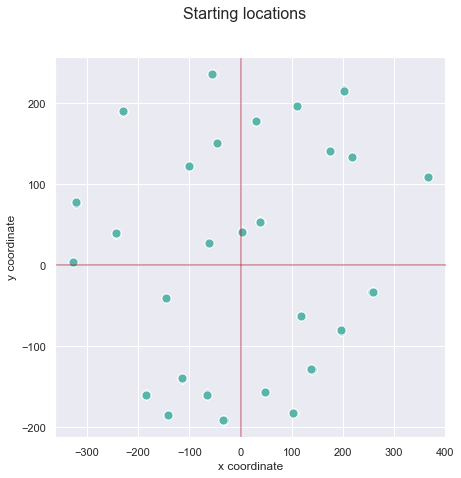

In [148]:
_, _ = plt.subplots(figsize=(7,7))

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80
).set(xlabel='x coordinate', ylabel='y coordinate')

plt.suptitle(t='Starting locations', size=16)
plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)
plt.show()

## Angular difference from the target building and Reaction times

Summary statistics of the angular errors and reaction times

In [121]:
df_cleaned[['final_360_angles', 'final_180_angles', 'RT']].describe()

,final_360_angles,final_180_angles,RT
count,3017.000000,3017.000000,3017.000000
mean,195.962686,-3.427437,7.642752
std,137.167835,65.864053,5.682087
min,0.049746,-179.881808,0.955793
25%,46.617934,-40.507297,3.416943
50%,248.185209,-4.628868,5.845356
75%,329.509538,30.581841,9.907099
max,359.983459,179.983386,28.141030


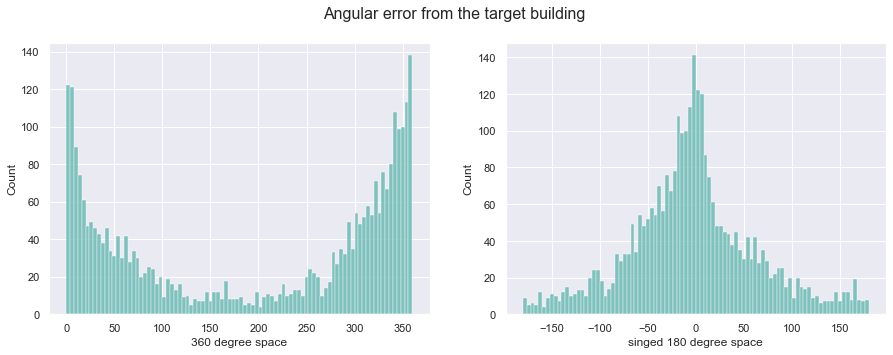

In [120]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(
    data=df_cleaned,
    x='final_360_angles',
    binwidth=4,
    ax=axes[0]
).set(xlabel='360 degree space')

sns.histplot(
    data=df_cleaned,
    x='final_180_angles',
    binwidth=4,
    ax=axes[1]
).set(xlabel='singed 180 degree space')

plt.suptitle('Angular error from the target building', size=16)
plt.savefig(f'{PLOT_PATH}/angular_diff_dist.png', bbox_inches='tight', dpi=90)

plt.show()

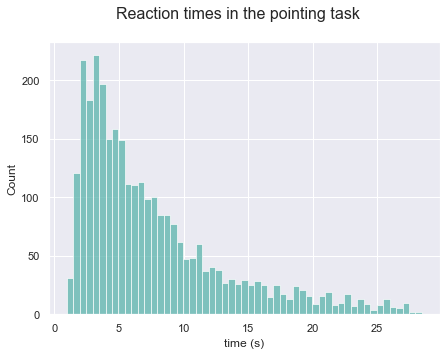

In [126]:
_, _ = plt.subplots(figsize=(7,5))

sns.histplot(
    data=df_cleaned,
    x='RT',
    binwidth=.5
).set(xlabel='time (s)')

plt.suptitle('Reaction times in the pointing task', size=16)
plt.savefig(f'{PLOT_PATH}/RT_dist.png', bbox_inches='tight', dpi=90)

plt.show()

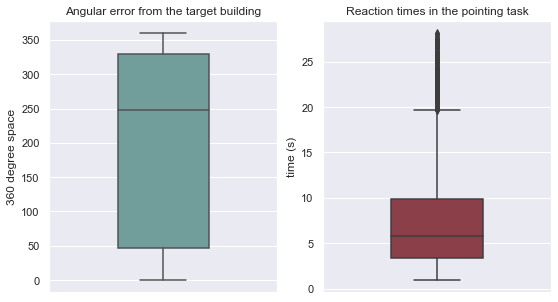

In [118]:
_, axes = plt.subplots(1, 2, figsize=(9,5))

sns.boxplot(
    data=df_cleaned,
    y='final_360_angles',
    orient='v',
    width=.4,
    saturation=.5,
    ax=axes[0]
).set(ylabel='360 degree space', title='Angular error from the target building')

sns.boxplot(
    data=df_cleaned,
    y='RT',
    orient='v',
    color=colorblind_palette[1],
    width=.4,
    saturation=.5,
    ax=axes[1]
).set(ylabel='time (s)', title='Reaction times in the pointing task')

plt.savefig(f'{PLOT_PATH}/angular_diff_RT_box_plot.png', bbox_inches='tight', dpi=90)

plt.show()

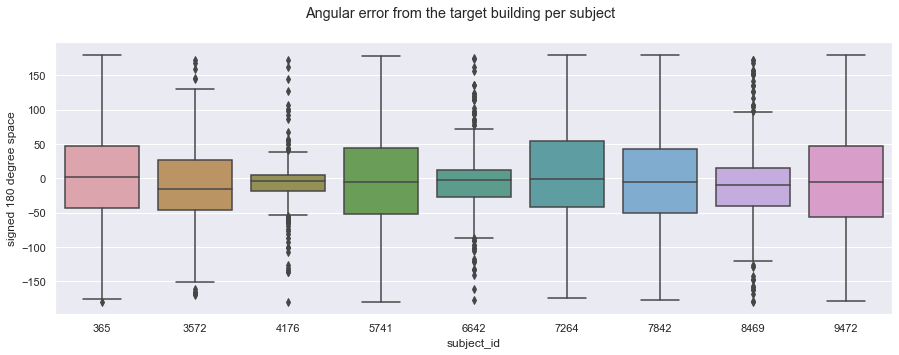

In [131]:
_, _ = plt.subplots(figsize=(15,5))

sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='final_180_angles',
    orient='v',
    saturation=.5
).set(ylabel='signed 180 degree space')


plt.suptitle('Angular error from the target building per subject')
plt.savefig(f'{PLOT_PATH}/angular_diff_box_plot_by_subject.png', bbox_inches='tight', dpi=90)

plt.show()

## Reaction times

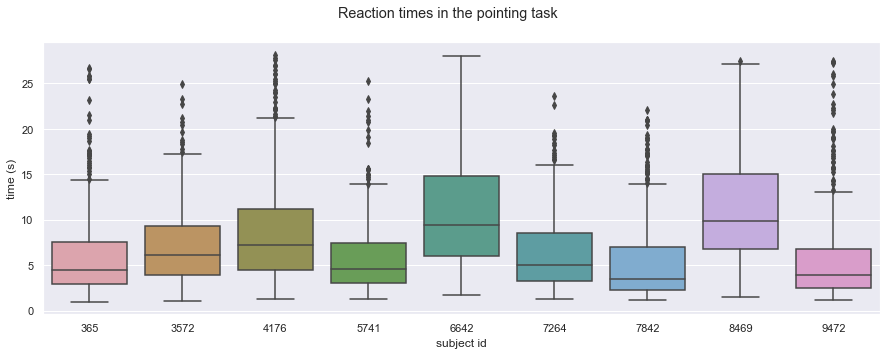

In [106]:
_, _ = plt.subplots(figsize=(15,5))

sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='RT',
    orient='v',
    saturation=.5
).set(xlabel='subject id', ylabel='time (s)')

plt.suptitle('Reaction times in the pointing task')
plt.savefig(f'{PLOT_PATH}/RT_box_plot_by_subject.png', bbox_inches='tight', dpi=90)

plt.show()

### Frequency and proportion of the angles

In [23]:
tmpdf = pd.DataFrame({
    'angles' : df_cleaned.rounded_360_angles.sort_values().unique(),
    'frequency' : df_cleaned.rounded_360_angles.value_counts().sort_index().values
})

tmpdf['proportion'] = tmpdf.frequency / len(df_cleaned)

tmpdf.to_csv(f'{FILE_PATH}/08_angle_frequency_proportion.csv', index=False)
del tmpdf

In [24]:
freq_df = pd.read_csv(f'{FILE_PATH}/08_angle_frequency_proportion.csv')
freq_df.head()

,angles,frequency,proportion
0,0.0,24,0.007955
1,1.0,34,0.011269
2,2.0,28,0.009281
3,3.0,25,0.008286
4,4.0,21,0.006961


In [25]:
freq_df.describe()

,angles,frequency,proportion
count,354.000000,354.000000,354.000000
mean,179.884181,8.522599,0.002825
std,105.337637,8.040323,0.002665
min,0.000000,1.000000,0.000331
25%,88.250000,3.000000,0.000994
50%,179.500000,6.000000,0.001989
75%,271.750000,13.000000,0.004309
max,360.000000,45.000000,0.014915


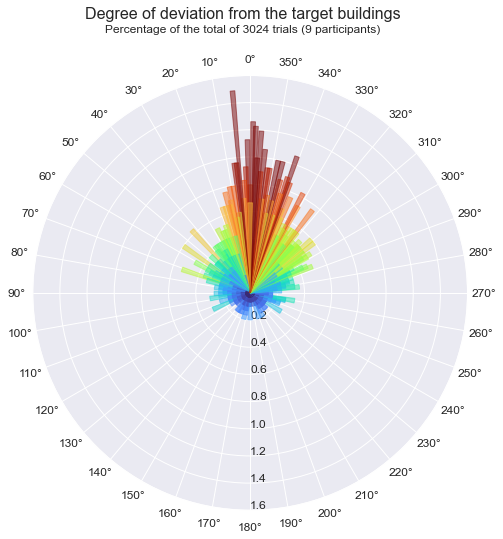

In [26]:
theta = np.deg2rad(freq_df.angles)
radii = freq_df.proportion
width = np.pi / (3*freq_df.frequency)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='polar'))

colors = plt.cm.turbo(freq_df.frequency / 30)

ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.5)

ax.set_rmax(0.016)
ax.set_theta_zero_location('N')
ax.set_rlabel_position(180)
ax.tick_params(labelsize=12)
ax.set_thetagrids(range(0, 360, 10))
ax.set_yticks(ax.get_yticks())

labels = [round(x*100, 1) for x in ax.get_yticks()]
ax.set_yticklabels(labels=labels)

plt.suptitle('Degree of deviation from the target buildings', size=16, y=1)
fig.text(0.5, 0.96, 'Percentage of the total of 3024 trials (9 participants)', ha='center', va='center', size=12)

plt.savefig(f'{PLOT_PATH}/02_deviation_degree_all.png', bbox_inches='tight', dpi=90)

plt.show()

### Angular difference to target by Factors `avatar presence` and  `context meaningfulness`

In [28]:
prop_dict = dict(freq_df[['frequency', 'proportion']].values)

tmpdf = (df_cleaned
         .groupby(['avatar_presence', 'meaningful', 'rounded_360_angles'])
         .rounded_360_angles
         .count()
         .reset_index(level=[0,1])
         .rename(columns={'rounded_360_angles' : 'frequency'})
         .reset_index()
         .rename(columns={'rounded_360_angles' : 'angles'})
         )
tmpdf['proportion'] = tmpdf.frequency.map(prop_dict)
tmpdf['theta'] = np.deg2rad(tmpdf.angles)

tmpdf.to_csv(f'{FILE_PATH}/09_factors_angle_frequency.csv', index=False)
del tmpdf

In [29]:
factors_df = pd.read_csv(f'{FILE_PATH}/09_factors_angle_frequency.csv')
factors_df.head()

,angles,avatar_presence,meaningful,frequency,proportion,theta
0,0.0,False,False,7,0.002320,0.000000
1,1.0,False,False,10,0.003315,0.017453
2,2.0,False,False,5,0.001657,0.034907
3,3.0,False,False,8,0.002652,0.052360
4,4.0,False,False,7,0.002320,0.069813


In [30]:
factors_df.describe()

,angles,frequency,proportion,theta
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,181.087719,2.940546,0.000975,3.160577
std,117.240142,2.359697,0.000782,2.046226
min,0.000000,1.000000,0.000331,0.000000
25%,68.250000,1.000000,0.000331,1.191187
50%,180.500000,2.000000,0.000663,3.150319
75%,294.000000,4.000000,0.001326,5.131268
max,360.000000,18.000000,0.005966,6.283185


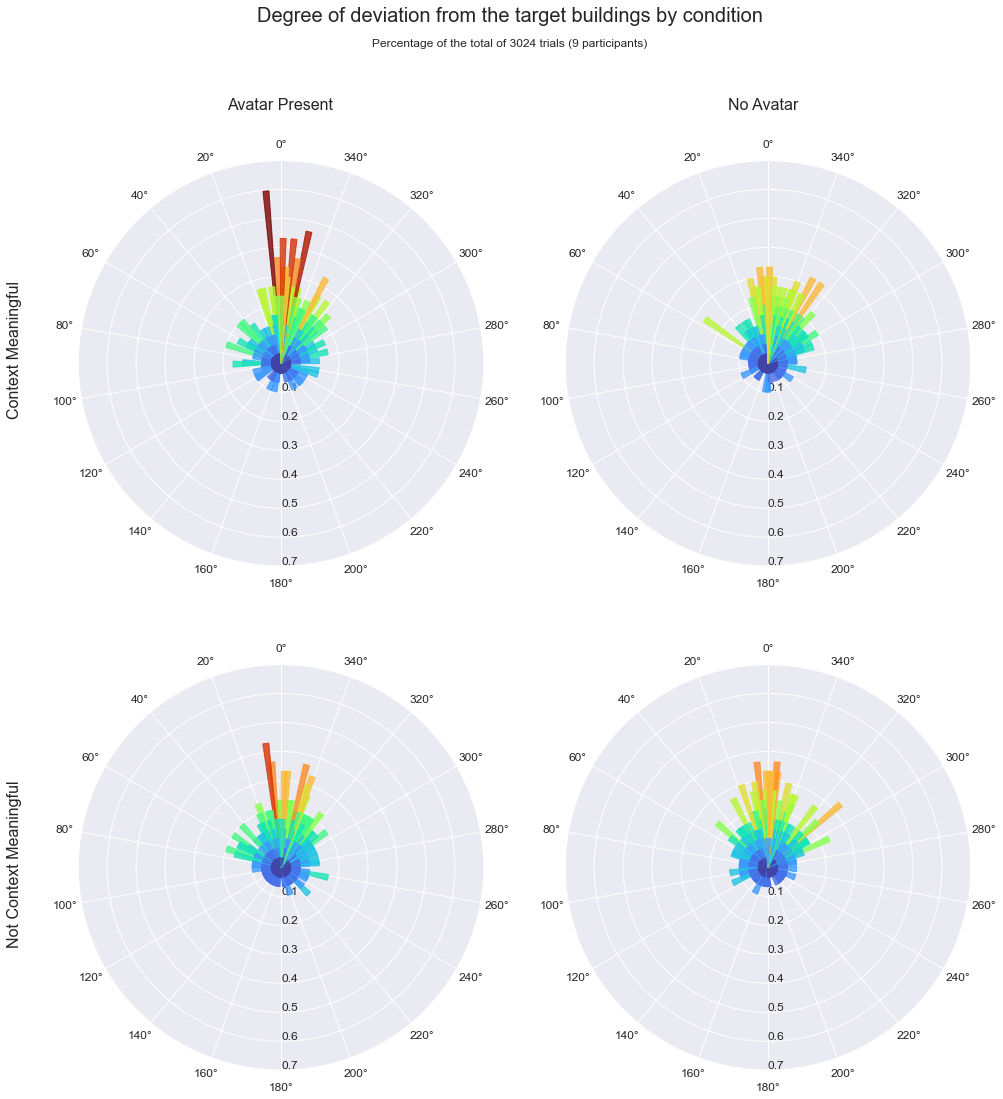

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16,17), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08


df1 = factors_df.query('meaningful==True & avatar_presence==True')
df2 = factors_df.query('meaningful==True & avatar_presence==False')
df3 = factors_df.query('meaningful==False & avatar_presence==True')
df4 = factors_df.query('meaningful==False & avatar_presence==False')

dfs = [df1, df2, df3, df4]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.92, 'Avatar Present', ha='center', va='center', size=16)
fig.text(0.72, 0.92, 'No Avatar', ha='center', va='center', size=16)
fig.text(0.07, 0.72, 'Context Meaningful', ha='center', va='center', rotation='vertical', size=16)
fig.text(0.07, 0.3, 'Not Context Meaningful', ha='center', va='center', rotation='vertical', size=16)
fig.text(0.5, 0.97, 'Percentage of the total of 3024 trials (9 participants)', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by condition', size=20, y=1)
plt.savefig(f'{PLOT_PATH}/03_conditions_deviation_degree.png', bbox_inches='tight', dpi=90)

plt.show()

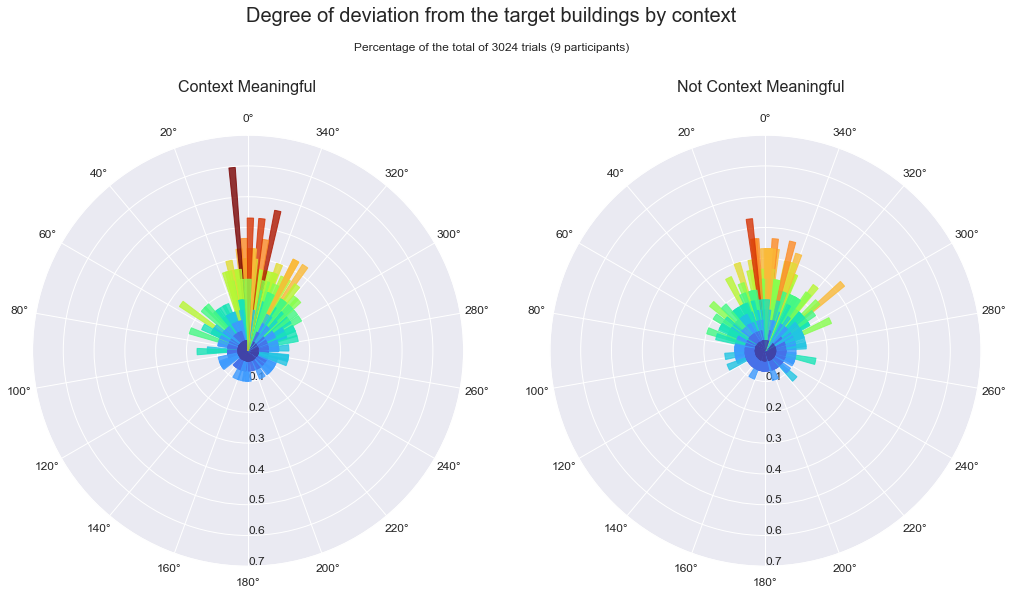

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(17,8), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('meaningful==True')
df2 = factors_df.query('meaningful==False')

dfs = [df1, df2]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(-180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.96, 'Context Meaningful', ha='center', va='center', size=16)
fig.text(0.72, 0.96, 'Not Context Meaningful', ha='center', va='center', size=16)
fig.text(0.5, 1.03, 'Percentage of the total of 3024 trials (9 participants)', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by context', size=20, y=1.1)
plt.savefig(f'{PLOT_PATH}/04_by_context_deviation_degree.png', bbox_inches='tight', dpi=90)

plt.show()

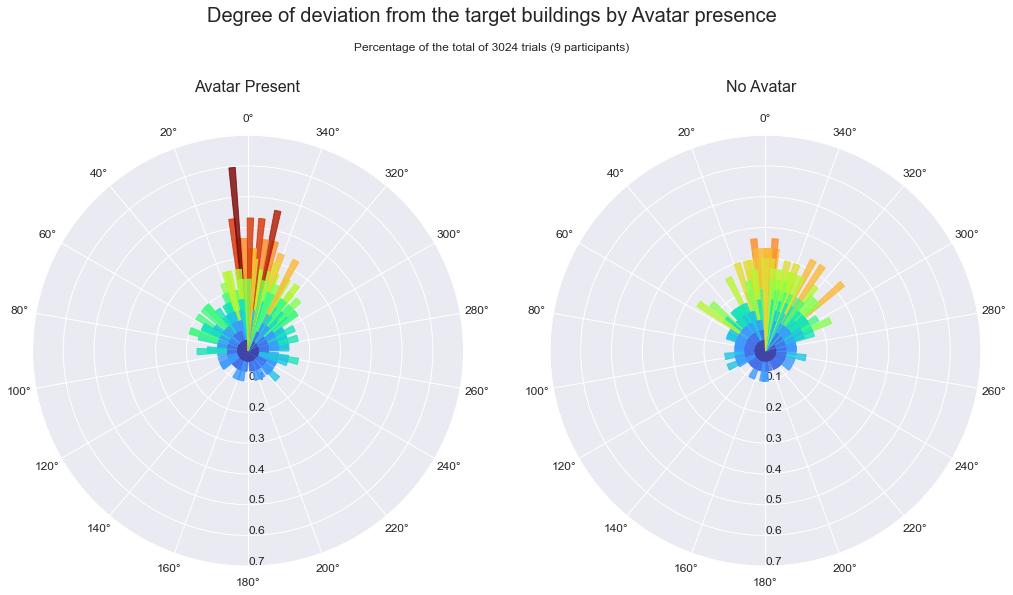

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(17,8), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('avatar_presence==True')
df2 = factors_df.query('avatar_presence==False')

dfs = [df1, df2]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(-180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.96, 'Avatar Present', ha='center', va='center', size=16)
fig.text(0.72, 0.96, 'No Avatar', ha='center', va='center', size=16)
fig.text(0.5, 1.03, 'Percentage of the total of 3024 trials (9 participants)', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by Avatar presence', size=20, y=1.1)
plt.savefig(f'{PLOT_PATH}/05_by_avatar_presence_deviation_degree.png', bbox_inches='tight', dpi=90)

plt.show()

Mean angular difference by subject

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subject_id               3017 non-null   int64  
 1   body_pos_x               3017 non-null   float64
 2   body_pos_z               3017 non-null   float64
 3   pointer_pos_x            3017 non-null   float64
 4   pointer_pos_z            3017 non-null   float64
 5   pointer_dir_x            3017 non-null   float64
 6   pointer_dir_z            3017 non-null   float64
 7   target_game_object_name  3017 non-null   object 
 8   avatar_presence          3017 non-null   bool   
 9   avatar_id                3017 non-null   int64  
 10  meaningful               3017 non-null   bool   
 11  trial_id                 3017 non-null   int64  
 12  image_name               3017 non-null   object 
 13  time_delta               3017 non-null   object 
 14  RT                      

RT and

In [41]:
df_cleaned.groupby('subject_id')[['final_360_angles', 'RT']].mean()

,final_360_angles,RT
subject_id,,
365,172.401837,6.209494
3572,212.428317,7.290979
4176,220.105477,8.945582
5741,189.211627,5.924472
6642,199.128162,11.073722
7264,184.063714,6.408739
7842,192.236196,5.552383
8469,204.886610,11.413347
9472,188.998598,5.934653


In [ ]:
# n_col = 5
# n_row = 14
#
# fig, axes = plt.subplots(n_row, n_col, figsize=(20,50))
# plt.subplots_adjust(hspace=0.2)
#
# for i, building in enumerate(df_cleaned.BuildingID.unique()):
#     df = df_cleaned[['BuildingID', 'final_360_angles']].query('BuildingID==@building')
#     ax = axes[i//n_col, i%n_col]
#     print(df.head(), f'ax = {ax}')
#     sns.histplot(df.final_360_angles, ax=ax, bins=50)
#     plt.show()